In [1]:
import matplotlib.pyplot as plt


def multi_slice_viewer(volume, index=0, figsize=(6, 6)):
    """
    Method for viewing 3D images in a jupyter notebook


    Parameters
    ----------


    volume : 3D numpy array
        3D image for viewing plane-wise

    index : int
        Image index to display, defaults to zero


    """
    __remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots(figsize=figsize)
    plt.tick_params(axis='both', which='both', top=False,
                    bottom=False, left=False, right=False,
                    labelbottom=False, labelleft=False)
    ax.volume = volume
    ax.index = index  # volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', __process_key)


def __process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        __previous_slice(ax)
    elif event.key == 'k':
        __next_slice(ax)
    fig.canvas.draw()


def __previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])


def __next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])


def __remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)


In [2]:
from PIL import Image
import numpy as np
img = Image.open('./data/example.tif')

In [3]:
im_arr = np.zeros((265,256,512))
for i in range(512):
    img.seek(i)
    im_arr[:,:,i] = img

(-0.5, 255.5, 264.5, -0.5)

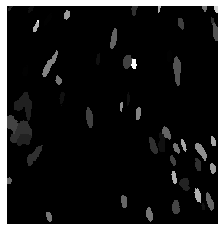

In [4]:
plt.imshow(im_arr[:,:,0], cmap='gray')
plt.axis('off')

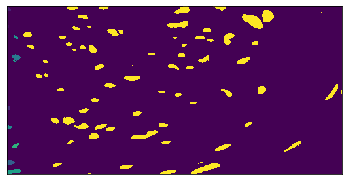

In [5]:
multi_slice_viewer(im_arr)